In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


pd.options.display.max_columns = None
pd.options.display.max_rows = 100


df = pd.read_csv('kc_house_data_original.csv')


In [2]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.price.max(), df.price.min()

(7700000.0, 78000.0)

In [4]:
df[df.bathrooms == 7.75].price.mean()

6890000.0

In [5]:
df[df.yr_built > 2000].price.mean(), df[df.yr_built < 2000].price.mean()

(615650.5489202292, 518157.2423252776)

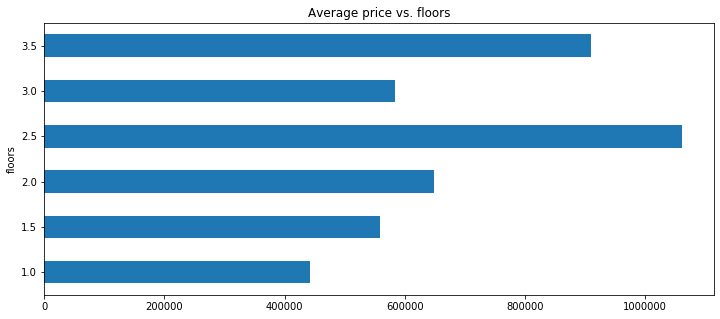

In [6]:
def bar_average(df,x,y, h = False):
    plt.figure(figsize = (12,5))
    x_grouped = df.groupby(f'{x}')[f'{y}'].mean()
    if h:
        x_grouped.plot.barh() 
    else: 
        x_grouped.plot.bar()
    plt.title(f'Average {y} vs. {x}')
#bathrooms vs. price
#bar_average(df, 'bathrooms', 'price', h= True)

#waterfront vs price
#bar_average(df, 'waterfront', 'price', h= True)

#grade vs price 
#bar_average(df, 'grade', 'price', h= True)

#condition vs. price 
bar_average(df, 'floors', 'price', h= True)

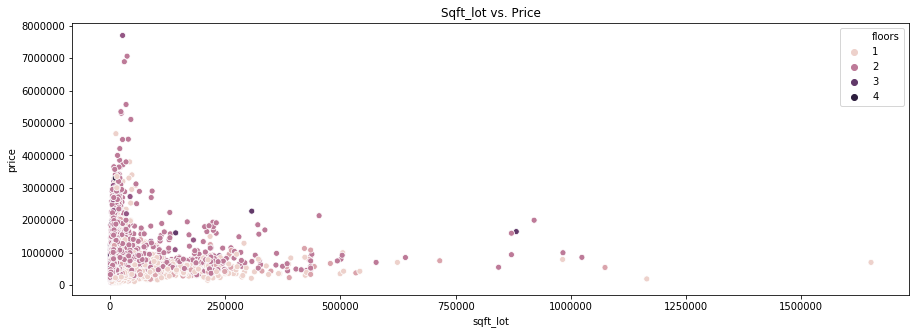

In [7]:
def plot_scatter(df, x,y, h = None): 
    plt.figure(figsize = (15,5))
    plt.title(f'{x.capitalize()} vs. {y.capitalize()}')
    sns.scatterplot(x=x, y=y, data=df, hue = h)

plot_scatter(df, 'sqft_lot', 'price', h = 'floors')


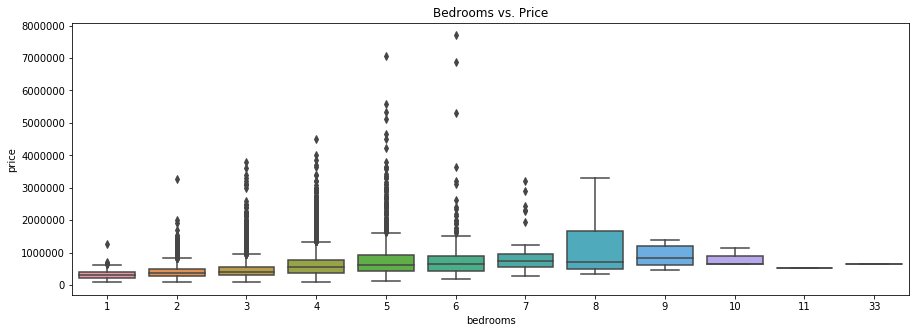

In [8]:
def plot_box(df, x,y): 
    plt.figure(figsize = (15,5))
    plt.title(f'{x.capitalize()} vs. {y.capitalize()}')
    sns.boxplot(x=x, y=y, data=df)

#plot_box(df, 'waterfront', 'price')
#plot_box(df,'floors', 'price')
plot_box(df, 'bedrooms', 'price')



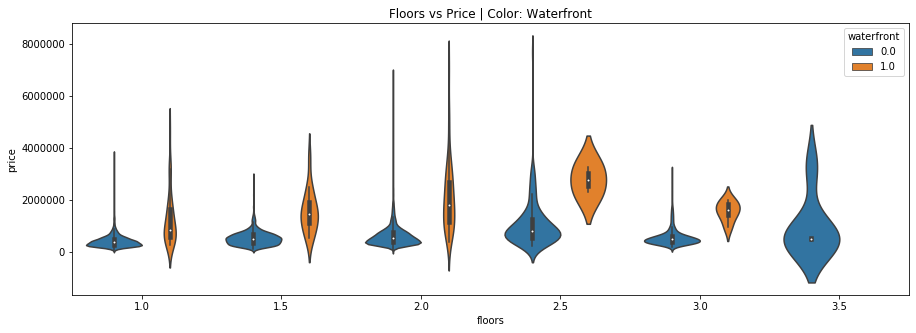

In [9]:
def violin_plot(df, x, y, h):
    plt.figure(figsize= (15,5))
    sns.violinplot(x = x, y = y, hue = h, data=df)
    plt.title(f'{x.capitalize()} vs {y.capitalize()} | Color: {h.capitalize()}')
violin_plot(df, 'floors', 'price', 'waterfront')

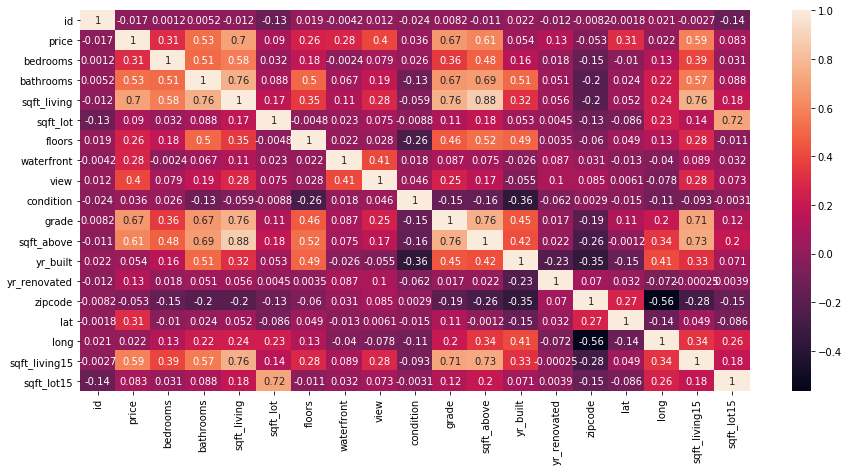

In [11]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True)